# Subplots

In module one, we talked about principles, which underly good visualizations, we pulled from work by Cairo and Tufty. In Module 2, we opened up the Matplotlib Python Library. Starting with the architecture and working our way through some the most common kinds of plots. Scatter plots, line graphs and bar charts.

In this module, we're going to do a bit deeper and talk about multiple plots with the same figure, interaction, animation and a few more kinds of plots which you might find useful in your data science journey.

Now, if you've been doing these assignments, you've undoubtedly been visiting our course discussion forums, going to stack overflow, and reading the matplotlib API documentation. I want to point you to the Matplotlib mailing list as well is another great resource. There would be resource posted below on how to browse that list. It's pretty common with open source projects to have two mailing lists. One for developers and the other for users. The users place is where most of the question answering happens. But I encourage to you look at the developer archives, too. To get an idea as to what these kind of projects look like behind the scenes.

Let's start this module with a deeper look at subplots. Thus far we have been using a single axis object to plot a single graph or figure. Sometimes it is useful to show two complex plot side by side for the viewer to compare. Matplotlib handles this with a single figure. Let's first set our rendering backend to the notebook backend, then import our pyplot module and NumPy, as we'll need then both.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

Signature: plt.subplot(*args, **kwargs)
Docstring:
Add an Axes to the current figure or retrieve an existing Axes.

This is a wrapper of `.Figure.add_subplot` which provides additional
behavior when working with the implicit API (see the notes section).

Call signatures::

   subplot(nrows, ncols, index, **kwargs)
   subplot(pos, **kwargs)
   subplot(**kwargs)
   subplot(ax)

Parameters
----------
*args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
    The position of the subplot described by one of

    - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
      *index* position on a grid with *nrows* rows and *ncols* columns.
      *index* starts at 1 in the upper left corner and increases to the
      right. *index* can also be a two-tuple specifying the (*first*,
      *last*) indices (1-based, and including *last*) of the subplot, e.g.,
      ``fig.add_subplot(3, 1, (1, 2))`` makes a subplot that spans the
      upper 2/3 of the figure.
    - 

If we look at the subplot documentation, we see that the first argument is the number of rows, the second the number of columns, and the third is the plot number. In matplotlib, a conceptual grid is overlayed on the figure. And a subplot command allows you to create axis to different portions of this grid.For instance, if we want to to create two plots side by side, we would call subplot with the parameters 1, 2, and 1. This would allow us to use 1 row, with 2 columns, and set the first axis to be the current axis.

So, let's create a new figure and then a new subplot with one row and two columns. The first axis object that pyplot will plot against is the left hand side.

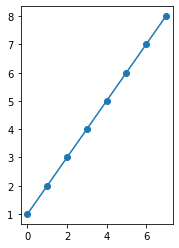

In [2]:
# let's create a new figure
plt.figure()

# and make a subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

# now let's plot some fake linear data
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')

 Okay, great we've got a skinny plot on the left hand side. If we made a second call to subplot() we could indicate that we also want to plot on the right hand side.

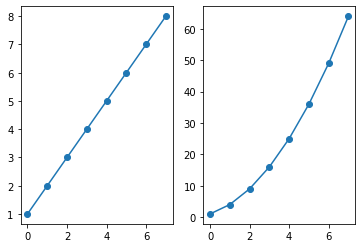

In [3]:
# Our previous data
plt.subplot(1, 2, 1)
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')

# now our new data in the second subplot
plt.subplot(1, 2, 2)
exponential_data = linear_data**2 
plt.plot(exponential_data, '-o')

And that's nice. Now we have two plots, each with their own axis objects. Now the norm with matplotlib is that you store the axis object that you get back from the subplot. But you can call subplot again. At any time with the parameters that interest you in order to get back a given axis.

Take a look at this figure though, do you notice anything odd about this image thinking of our first week of the course? The two images have different y axes values. This would be a problem and potential mislead the reader if we didn't find a way to lock axis between two plots. When you create a new subplot you are able to share the x, y, or both axis using the share x and share y parameters.

Let's clean this up.

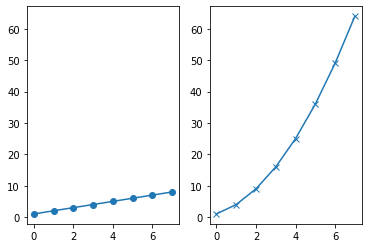

In [4]:
# Let's plot the first figure and get a reference to that axes
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# now let's tell the next plot we want to share the y axes with the
# one from ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(122, sharey=ax1)
plt.plot(exponential_data, '-x')

There we go. Two plots side by side and we've locked the y axis.

Now, those of you who have been playing close attention will note that I used the `subplot` function a second time but I didn't pass in three parameters, just one. The maplotlib developers allow you to specify the row, columns, and number of the plot that you want with either three parameters or a single parameter. Where the hundreds values the first argument, the tens the second argument, and the ones the third argument.

Now, I'm frankly not a big fan of this second syntax -- it feels pretty hacky and it really only saves typing two commas and yet limits us to single digit. Computer science folks might feel a little twitch inside like something's wrong with this notation, and I'll say that it certainly bugged me the first few times I saw it. But I wanted you to be aware of it so you would be able to read it when you come across it in the docs.

An important fact to remember is that the plot location in the matrix of items is index starting at one and not at zero, as would be the convention if you were using something like NumPy. So if you're iterating through a matrix or list, create subplots, remember to start at position plus one.

Now, there's a nice function called subplots, note the plural, which allows you to get many axis objects at once, and I think this is great. So, if we wanted to get a three by three grid with all of the axis x and y ranges locked, we can do so like this.

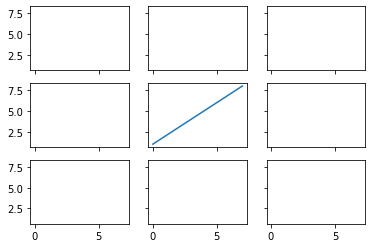

In [5]:
# create a 3x3 grid of subplots, using tuple unpacking
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

The syntax looks a little goofy maybe since we're unpacking the results of the subplots function directly, but it's an effective way to build a grid where everything shares an axis. The results however look really nice, but note that this method turns off the y and x labels except for those plots which are on the left hand side or the bottom of the figure.

Of course, we can just iterate through a list and plot one plot at a time, we don't have to store a reference to each axes.

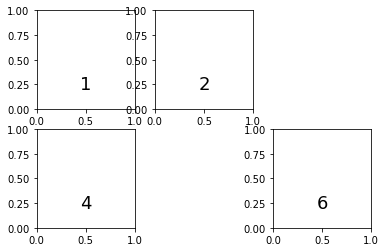

In [6]:
# So, let's create a basic figure
fig = plt.gcf()
# Now let's iterate over 6 potential spots in our figure. I'm going to create a plot with 2 rows and 3 columns
for i in range(1, 7):
    # let's not plot something if we are at position 5 or 3, we'll leave these as holes just to see what happens
    if i != 5 and i != 3:
        # Now let's add a subplot, we specify the first two arguments as the structure we are expecting the 
        # figure to take, so 2 rows and 3 columns, and the third argument is the position of this item in the 
        # figure, in this case i. 
        # While we are iterating linearly this is mapped onto our 2x3 row/column space, so the
        # numbering goes from left to right and top to bottom
        ax = fig.add_subplot(2, 3, i)
        # And we'll just add some text to the figures to make it more clear which item went where.
        # Remember from the lecture on annotation that text goes at the bottom left corner by default, 
        # and we are using relative positioning
        ax.text(0.5, 0.2, str((i)),fontsize=18, ha='center')

## SPLOMS

So, we now understand why there are abstractions of Axes in a figure, because a figure might have several
Axes objects which show multiple views of data. A common data science visual exploration technique is called
the SPLOM, which stands for scatterplot matrices. These are particularly useful for getting the relationship
between a number of different variables from a quick glance. Now, a SPLOM is actually similar to what
Edward Tufte called a "small multiple" -- a set of visuals that look at related data but that slice that
data into different small visuals so you can see both the trees and the forest at once.

Let's take a look, I'm going to use some data from the iris dataset

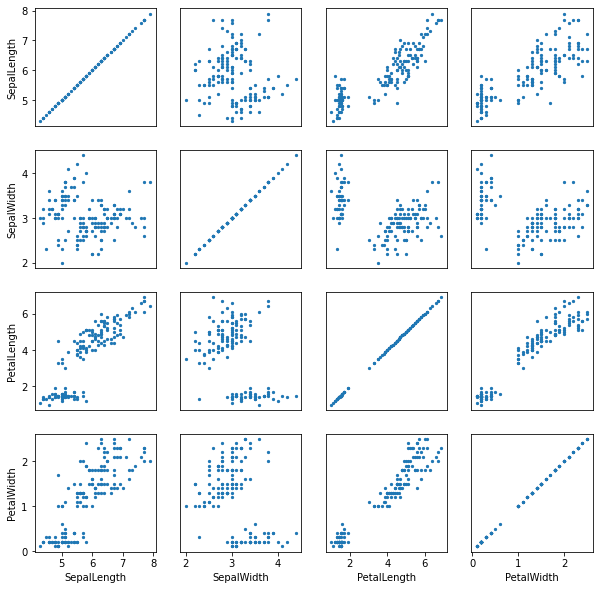

In [7]:
# Let's first capture a list of the variables we are interested in
import pandas as pd
df=pd.read_csv("../assets/iris.csv")
cols = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

# Now we need to create a grid of subplots of size width and height equal to the number of different variables
# we want to explore, in this case that's a 4x4 grid
fig, axs = plt.subplots(len(cols), len(cols), figsize=(10,10))

# Now we want to iterate across each column in our dataframe and compare it to each other column in our
# DataFrame. We'll do this with a couple of nested for loops
for i in range(len(cols)):
    for j in range(len(cols)):
        # Now we just want to plot a scatter plot comparing the columns i and j. Sometimes this will be the
        # same column, so we would expect to see a diagnol line trend. I'm going to set the marker size to 5
        # just to make things a bit more clear
        axs[i,j].scatter(df[cols[j]], df[cols[i]], s=5)

        # Also, we've seen that when we plot multiple Axes things get cluttered with Axis tickmarks and
        # labels, so let's turn those off
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)

        # Then we'll turn them back on only if we are the last row...
        if i == len(cols) - 1:
            axs[i,j].get_xaxis().set_visible(True)
            axs[i,j].set_xlabel(cols[j])
            
        # ...and similarly, only show the y-axis labels for the first column.
        if j == 0:
            axs[i,j].get_yaxis().set_visible(True)
            axs[i,j].set_ylabel(cols[i])

# Now let's take a look at our data!

Okay, great! We have a nice example of a SPLOM, and we can easily compare the length and width of sepals and pedals. and look for trends at a glance. One that jumps out to me is that the petal width, the bottom row, has a pretty linear relationship with the petal length, the third scatter plot over. This doesn't seem to be true if you compared the sepalwidth to the sepal length, by looking at the second row and the first column cell.

In the next module, I want to exploit our new knowledge of subplots while introducing you to pretty fundamental data science chart, the histogram.

___

# Practice Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np

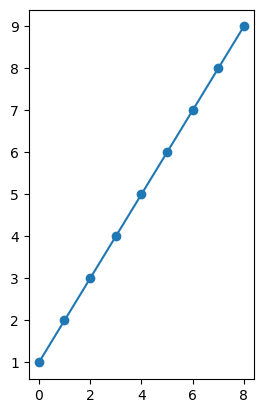

In [2]:
plt.figure()
plt.subplot(1,2,1)
linear_data = np.array([1,2,3,4,5,6,7,8,9])
plt.plot(linear_data, '-o')

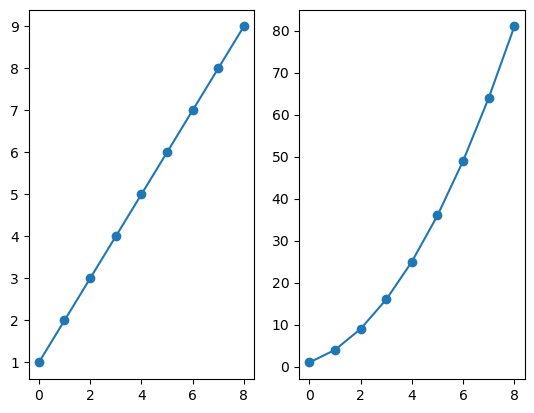

In [3]:
# 1st row, 2nd col and 1st subplot axis
plt.subplot(1,2,1)
linear_data = np.array([1,2,3,4,5,6,7,8,9])
plt.plot(linear_data, '-o')

# 1st row, 2nd col and 2nd subplot axis
plt.subplot(1,2,2)
exponential_data = linear_data ** 2
plt.plot(exponential_data, '-o')

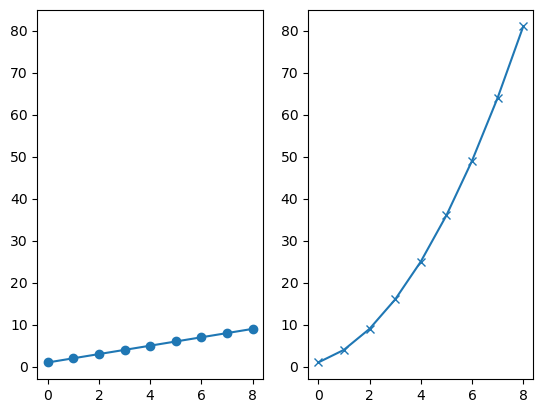

In [6]:
# now its confusing as the both are heading in same direction
# so share y axis so that they both have same data
ax1 = plt.subplot(1,2,1)
plt.plot(linear_data, '-o')

ax2 = plt.subplot(122, sharey=ax1)
plt.plot(exponential_data, '-x')

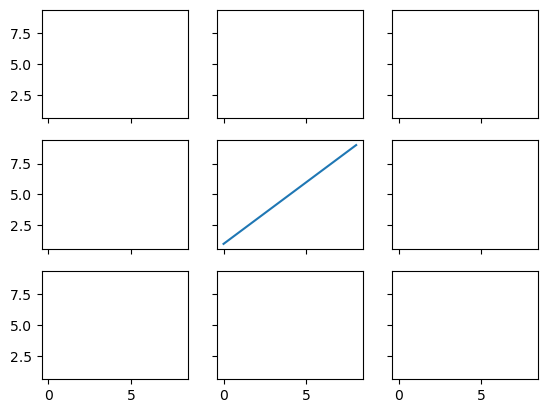

In [9]:
# when you want to compare more items with each other
# finding relationships


fig , ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3,3, sharex=True, sharey=True)

ax5.plot(linear_data, '-')